

<center> <h1> <b><span style="color:orange"> 
Predictive Analysis Using Regression Trees Model (CART)<br><br>
By: Zubeka Dane Dang </span></b></h1>

### Data set: 
We’ll use the Boston data set from the sklearn.datasets  for predicting the median house value (mdev), in Boston Suburbs,  using different predictor variables.

<h1> <b><span style="color:green"> 1. Create a new python project and import/ load the dataset.  </span></b></h1>

In [7]:
#Using this code to run and display all the results at once
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [8]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import graphviz
import seaborn as sns
%matplotlib inline

In [9]:
df = pd.read_csv('Boston.csv')
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


<h1> <b><span style="color:green"> 2. Run different statistical inspection and preprocessing on the dataset. </span></b></h1>

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [11]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [12]:
df.corr()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


Plotting correlation heatmap 

<Figure size 1000x800 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Lower Triangular Correlation Heatmap of Numerical Features')

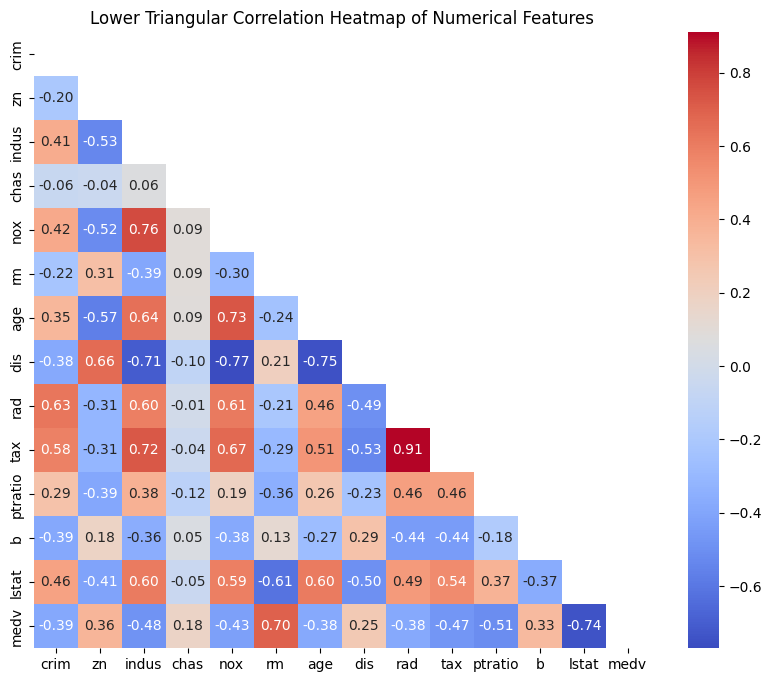

In [13]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Calculate correlation matrix
correlation_matrix = df[numerical_cols].corr()

# Create a mask to hide the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Plot lower triangular heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Lower Triangular Correlation Heatmap of Numerical Features')
plt.show()

We can see that the 'lstat' feature (lower status of the population) and rm feature (average number of rooms per dwelling) have significant correlation with the target value 'medv' (Median value of owner-occupied homes in $1000's).

<h1> <b><span style="color:green"> 3.	Split the data into training and testing datasets (chose different values) </span></b></h1>

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import confusion_matrix, mean_squared_error

In [16]:
X = df[['rm', 'lstat']]
y = df.medv
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 0)


<h1> <b><span style="color:green"> 4.	Create the regression tree </span></b></h1>

In [17]:
# Since pruning not supported, we can choose max depth 2
regr_tree_boston = DecisionTreeRegressor(max_depth = 2)
regr_tree_boston.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2)

We use the `export_graphviz()` function to export the tree structure to a temporary `.dot` file,
and the `graphviz.Source()` function to display the image:

In [18]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin/'

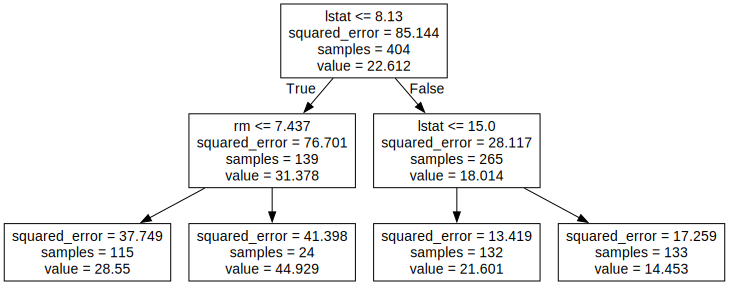

In [19]:
#Tree plot
export_graphviz(regr_tree_boston, 
                out_file = "boston_tree.dot", 
                feature_names = X_train.columns)

with open("boston_tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

The variable 'lstat' calculates the percentage proportion of people with low socioeconomic status. Lower values of 'lstat' correspond to more expensive properties, according to the tree. 

The tree predicts a median house price of $44,929 for larger homes (average number of rooms:'rm' >=7.437) in high socioeconomic class suburbs ('lstat' <= 8.13).

Now let's see how it does on the test data:

Text(0.5, 0, 'pred')

Text(0, 0.5, 'y_test')

MSE = 35.406
RMSE = 5.95


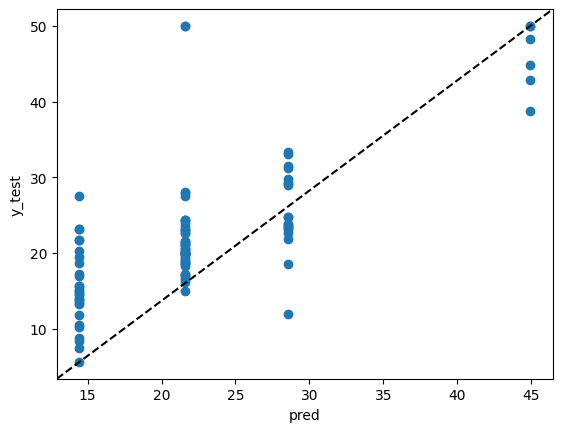

In [20]:
pred = regr_tree_boston.predict(X_test)

plt.scatter(pred, 
            y_test, 
            label = 'medv')

plt.plot([0, 1], 
         [0, 1], 
         '--k', 
         transform = plt.gca().transAxes)

plt.xlabel('pred')
plt.ylabel('y_test')

print("MSE =", mean_squared_error(y_test, pred).round(3))
print("RMSE =", mean_squared_error(y_test, pred, squared=False).round(3))

The test set MSE associated with the regression tree is
35.4. The square root of the MSE is therefore around 5.95, indicating
that this model leads to test predictions that are within around \$5,950 of
the true median home value for the suburb.

<Axes: >

Text(0.5, 0, 'Variable Importance')

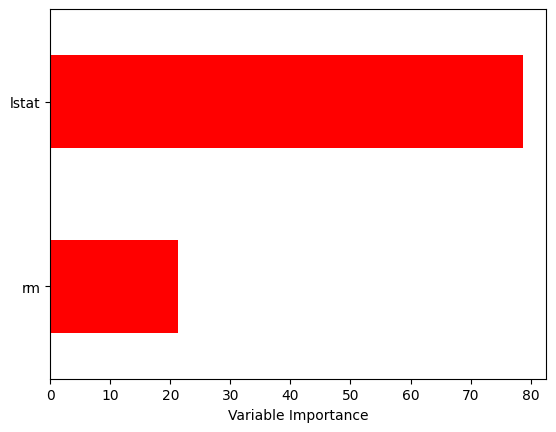

In [21]:
# Plot of Important Features
feature_importance = regr_tree_boston.feature_importances_*100

rel_imp = pd.Series(feature_importance, 
                    index = X.columns).sort_values(inplace = False)

rel_imp.T.plot(kind = 'barh', 
               color = 'r', )

plt.xlabel('Variable Importance')

plt.gca().legend_ = None

We can see that 'lstat' is the most importance feature that decide the housing price in Boston.

Now we can change some setting of the hyperparameters to get the best accuracy.

DecisionTreeRegressor(max_depth=10, min_samples_leaf=10, random_state=42)

Text(0.5, 0, 'pred')

Text(0, 0.5, 'y_test')

MSE = 28.425
RMSE = 5.332


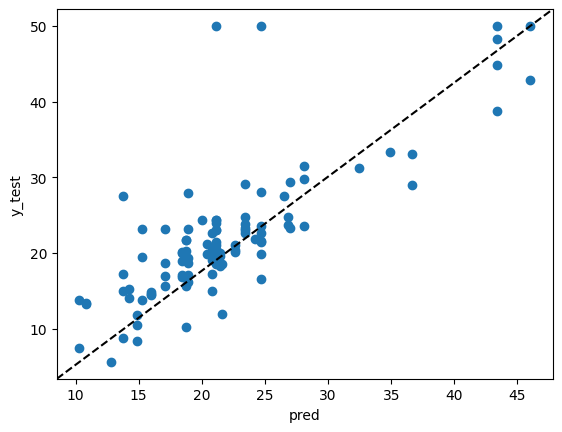

In [22]:
# Try max depth = 10, and min_samples_leaf=10

regr_tree_boston2 = DecisionTreeRegressor(max_depth = 10, random_state=42, min_samples_leaf=10)
# regr_tree_boston2 = DecisionTreeRegressor(random_state=42)
# regr_tree_boston2 = DecisionTreeRegressor(max_depth = 3, random_state=42, min_samples_leaf=10)
# regr_tree_boston2 = DecisionTreeRegressor(max_depth = 10, random_state=42, min_samples_leaf=6)

regr_tree_boston2.fit(X_train, y_train)

pred = regr_tree_boston2.predict(X_test)

plt.scatter(pred, 
            y_test, 
            label = 'medv')

plt.plot([0, 1], 
         [0, 1], 
         '--k', 
         transform = plt.gca().transAxes)

plt.xlabel('pred')
plt.ylabel('y_test')

print("MSE =", mean_squared_error(y_test, pred).round(3))
print("RMSE =", mean_squared_error(y_test, pred, squared=False).round(3))


The MSE (28.4) and RMSE (5.3) value of model signifincantly reduced when we changed hyperparameter to : max_depth = 10, random_state=42, min_samples_leaf=10.

We can see that the MSE (28.42) and RMSE (5.33) value significantly reduce when we change the hyperparameter to max depth = 10, random_state=42 and min_samples_leaf=10.

Now we will try to find the most optimal cp(complexity parameter) that minimizes the model's RMSE:

<h1> <b><span style="color:green"> 5.	Find the best “complexity parameter” value that minimize the prediction error RMSE (root mean squared error). </span></b></h1>

In [23]:
# Define a range of cp values to test
cp_values = np.linspace(0.001, 0.1, 100)

# Initialize lists to store RMSE values
rmse_values = []

# Loop through different cp values
for cp in cp_values:
    regr_tree = DecisionTreeRegressor(max_depth=10, random_state=42, min_samples_leaf=10, ccp_alpha=cp)
    regr_tree.fit(X_train, y_train)
    pred = regr_tree.predict(X_test)
    rmse = mean_squared_error(y_test, pred, squared=False)
    rmse_values.append(rmse)

# Find the best cp that minimizes RMSE
best_cp = cp_values[np.argmin(rmse_values)]
best_rmse = min(rmse_values)

print(f"Best cp: {best_cp:.3f}")
print(f"Best RMSE: {best_rmse:.3f}")

DecisionTreeRegressor(ccp_alpha=0.001, max_depth=10, min_samples_leaf=10,
                      random_state=42)

DecisionTreeRegressor(ccp_alpha=0.002, max_depth=10, min_samples_leaf=10,
                      random_state=42)

DecisionTreeRegressor(ccp_alpha=0.003, max_depth=10, min_samples_leaf=10,
                      random_state=42)

DecisionTreeRegressor(ccp_alpha=0.004, max_depth=10, min_samples_leaf=10,
                      random_state=42)

DecisionTreeRegressor(ccp_alpha=0.005, max_depth=10, min_samples_leaf=10,
                      random_state=42)

DecisionTreeRegressor(ccp_alpha=0.006, max_depth=10, min_samples_leaf=10,
                      random_state=42)

DecisionTreeRegressor(ccp_alpha=0.007, max_depth=10, min_samples_leaf=10,
                      random_state=42)

DecisionTreeRegressor(ccp_alpha=0.008, max_depth=10, min_samples_leaf=10,
                      random_state=42)

DecisionTreeRegressor(ccp_alpha=0.009000000000000001, max_depth=10,
                      min_samples_leaf=10, random_state=42)

DecisionTreeRegressor(ccp_alpha=0.010000000000000002, max_depth=10,
                      min_samples_leaf=10, random_state=42)

DecisionTreeRegressor(ccp_alpha=0.011, max_depth=10, min_samples_leaf=10,
                      random_state=42)

DecisionTreeRegressor(ccp_alpha=0.012, max_depth=10, min_samples_leaf=10,
                      random_state=42)

DecisionTreeRegressor(ccp_alpha=0.013000000000000001, max_depth=10,
                      min_samples_leaf=10, random_state=42)

DecisionTreeRegressor(ccp_alpha=0.014000000000000002, max_depth=10,
                      min_samples_leaf=10, random_state=42)

DecisionTreeRegressor(ccp_alpha=0.015, max_depth=10, min_samples_leaf=10,
                      random_state=42)

DecisionTreeRegressor(ccp_alpha=0.016, max_depth=10, min_samples_leaf=10,
                      random_state=42)

DecisionTreeRegressor(ccp_alpha=0.017, max_depth=10, min_samples_leaf=10,
                      random_state=42)

DecisionTreeRegressor(ccp_alpha=0.018000000000000002, max_depth=10,
                      min_samples_leaf=10, random_state=42)

DecisionTreeRegressor(ccp_alpha=0.019000000000000003, max_depth=10,
                      min_samples_leaf=10, random_state=42)

DecisionTreeRegressor(ccp_alpha=0.02, max_depth=10, min_samples_leaf=10,
                      random_state=42)

DecisionTreeRegressor(ccp_alpha=0.021, max_depth=10, min_samples_leaf=10,
                      random_state=42)

DecisionTreeRegressor(ccp_alpha=0.022000000000000002, max_depth=10,
                      min_samples_leaf=10, random_state=42)

DecisionTreeRegressor(ccp_alpha=0.023, max_depth=10, min_samples_leaf=10,
                      random_state=42)

DecisionTreeRegressor(ccp_alpha=0.024, max_depth=10, min_samples_leaf=10,
                      random_state=42)

DecisionTreeRegressor(ccp_alpha=0.025, max_depth=10, min_samples_leaf=10,
                      random_state=42)

DecisionTreeRegressor(ccp_alpha=0.026000000000000002, max_depth=10,
                      min_samples_leaf=10, random_state=42)

DecisionTreeRegressor(ccp_alpha=0.027000000000000003, max_depth=10,
                      min_samples_leaf=10, random_state=42)

DecisionTreeRegressor(ccp_alpha=0.028, max_depth=10, min_samples_leaf=10,
                      random_state=42)

DecisionTreeRegressor(ccp_alpha=0.029, max_depth=10, min_samples_leaf=10,
                      random_state=42)

DecisionTreeRegressor(ccp_alpha=0.030000000000000002, max_depth=10,
                      min_samples_leaf=10, random_state=42)

DecisionTreeRegressor(ccp_alpha=0.031, max_depth=10, min_samples_leaf=10,
                      random_state=42)

DecisionTreeRegressor(ccp_alpha=0.032, max_depth=10, min_samples_leaf=10,
                      random_state=42)

DecisionTreeRegressor(ccp_alpha=0.033, max_depth=10, min_samples_leaf=10,
                      random_state=42)

DecisionTreeRegressor(ccp_alpha=0.034, max_depth=10, min_samples_leaf=10,
                      random_state=42)

DecisionTreeRegressor(ccp_alpha=0.035, max_depth=10, min_samples_leaf=10,
                      random_state=42)

DecisionTreeRegressor(ccp_alpha=0.036000000000000004, max_depth=10,
                      min_samples_leaf=10, random_state=42)

DecisionTreeRegressor(ccp_alpha=0.037000000000000005, max_depth=10,
                      min_samples_leaf=10, random_state=42)

DecisionTreeRegressor(ccp_alpha=0.038, max_depth=10, min_samples_leaf=10,
                      random_state=42)

DecisionTreeRegressor(ccp_alpha=0.039, max_depth=10, min_samples_leaf=10,
                      random_state=42)

DecisionTreeRegressor(ccp_alpha=0.04, max_depth=10, min_samples_leaf=10,
                      random_state=42)

DecisionTreeRegressor(ccp_alpha=0.041, max_depth=10, min_samples_leaf=10,
                      random_state=42)

DecisionTreeRegressor(ccp_alpha=0.042, max_depth=10, min_samples_leaf=10,
                      random_state=42)

DecisionTreeRegressor(ccp_alpha=0.043000000000000003, max_depth=10,
                      min_samples_leaf=10, random_state=42)

DecisionTreeRegressor(ccp_alpha=0.044000000000000004, max_depth=10,
                      min_samples_leaf=10, random_state=42)

DecisionTreeRegressor(ccp_alpha=0.045, max_depth=10, min_samples_leaf=10,
                      random_state=42)

DecisionTreeRegressor(ccp_alpha=0.046, max_depth=10, min_samples_leaf=10,
                      random_state=42)

DecisionTreeRegressor(ccp_alpha=0.047, max_depth=10, min_samples_leaf=10,
                      random_state=42)

DecisionTreeRegressor(ccp_alpha=0.048, max_depth=10, min_samples_leaf=10,
                      random_state=42)

DecisionTreeRegressor(ccp_alpha=0.049, max_depth=10, min_samples_leaf=10,
                      random_state=42)

DecisionTreeRegressor(ccp_alpha=0.05, max_depth=10, min_samples_leaf=10,
                      random_state=42)

DecisionTreeRegressor(ccp_alpha=0.051000000000000004, max_depth=10,
                      min_samples_leaf=10, random_state=42)

DecisionTreeRegressor(ccp_alpha=0.052000000000000005, max_depth=10,
                      min_samples_leaf=10, random_state=42)

DecisionTreeRegressor(ccp_alpha=0.053000000000000005, max_depth=10,
                      min_samples_leaf=10, random_state=42)

DecisionTreeRegressor(ccp_alpha=0.054, max_depth=10, min_samples_leaf=10,
                      random_state=42)

DecisionTreeRegressor(ccp_alpha=0.055, max_depth=10, min_samples_leaf=10,
                      random_state=42)

DecisionTreeRegressor(ccp_alpha=0.056, max_depth=10, min_samples_leaf=10,
                      random_state=42)

DecisionTreeRegressor(ccp_alpha=0.057, max_depth=10, min_samples_leaf=10,
                      random_state=42)

DecisionTreeRegressor(ccp_alpha=0.058, max_depth=10, min_samples_leaf=10,
                      random_state=42)

DecisionTreeRegressor(ccp_alpha=0.059000000000000004, max_depth=10,
                      min_samples_leaf=10, random_state=42)

DecisionTreeRegressor(ccp_alpha=0.060000000000000005, max_depth=10,
                      min_samples_leaf=10, random_state=42)

DecisionTreeRegressor(ccp_alpha=0.061, max_depth=10, min_samples_leaf=10,
                      random_state=42)

DecisionTreeRegressor(ccp_alpha=0.062, max_depth=10, min_samples_leaf=10,
                      random_state=42)

DecisionTreeRegressor(ccp_alpha=0.063, max_depth=10, min_samples_leaf=10,
                      random_state=42)

DecisionTreeRegressor(ccp_alpha=0.064, max_depth=10, min_samples_leaf=10,
                      random_state=42)

DecisionTreeRegressor(ccp_alpha=0.065, max_depth=10, min_samples_leaf=10,
                      random_state=42)

DecisionTreeRegressor(ccp_alpha=0.066, max_depth=10, min_samples_leaf=10,
                      random_state=42)

DecisionTreeRegressor(ccp_alpha=0.067, max_depth=10, min_samples_leaf=10,
                      random_state=42)

DecisionTreeRegressor(ccp_alpha=0.068, max_depth=10, min_samples_leaf=10,
                      random_state=42)

DecisionTreeRegressor(ccp_alpha=0.069, max_depth=10, min_samples_leaf=10,
                      random_state=42)

DecisionTreeRegressor(ccp_alpha=0.07, max_depth=10, min_samples_leaf=10,
                      random_state=42)

DecisionTreeRegressor(ccp_alpha=0.07100000000000001, max_depth=10,
                      min_samples_leaf=10, random_state=42)

DecisionTreeRegressor(ccp_alpha=0.07200000000000001, max_depth=10,
                      min_samples_leaf=10, random_state=42)

DecisionTreeRegressor(ccp_alpha=0.07300000000000001, max_depth=10,
                      min_samples_leaf=10, random_state=42)

DecisionTreeRegressor(ccp_alpha=0.074, max_depth=10, min_samples_leaf=10,
                      random_state=42)

DecisionTreeRegressor(ccp_alpha=0.075, max_depth=10, min_samples_leaf=10,
                      random_state=42)

DecisionTreeRegressor(ccp_alpha=0.076, max_depth=10, min_samples_leaf=10,
                      random_state=42)

DecisionTreeRegressor(ccp_alpha=0.077, max_depth=10, min_samples_leaf=10,
                      random_state=42)

DecisionTreeRegressor(ccp_alpha=0.078, max_depth=10, min_samples_leaf=10,
                      random_state=42)

DecisionTreeRegressor(ccp_alpha=0.079, max_depth=10, min_samples_leaf=10,
                      random_state=42)

DecisionTreeRegressor(ccp_alpha=0.08, max_depth=10, min_samples_leaf=10,
                      random_state=42)

DecisionTreeRegressor(ccp_alpha=0.081, max_depth=10, min_samples_leaf=10,
                      random_state=42)

DecisionTreeRegressor(ccp_alpha=0.082, max_depth=10, min_samples_leaf=10,
                      random_state=42)

DecisionTreeRegressor(ccp_alpha=0.083, max_depth=10, min_samples_leaf=10,
                      random_state=42)

DecisionTreeRegressor(ccp_alpha=0.084, max_depth=10, min_samples_leaf=10,
                      random_state=42)

DecisionTreeRegressor(ccp_alpha=0.085, max_depth=10, min_samples_leaf=10,
                      random_state=42)

DecisionTreeRegressor(ccp_alpha=0.08600000000000001, max_depth=10,
                      min_samples_leaf=10, random_state=42)

DecisionTreeRegressor(ccp_alpha=0.08700000000000001, max_depth=10,
                      min_samples_leaf=10, random_state=42)

DecisionTreeRegressor(ccp_alpha=0.08800000000000001, max_depth=10,
                      min_samples_leaf=10, random_state=42)

DecisionTreeRegressor(ccp_alpha=0.089, max_depth=10, min_samples_leaf=10,
                      random_state=42)

DecisionTreeRegressor(ccp_alpha=0.09, max_depth=10, min_samples_leaf=10,
                      random_state=42)

DecisionTreeRegressor(ccp_alpha=0.091, max_depth=10, min_samples_leaf=10,
                      random_state=42)

DecisionTreeRegressor(ccp_alpha=0.092, max_depth=10, min_samples_leaf=10,
                      random_state=42)

DecisionTreeRegressor(ccp_alpha=0.093, max_depth=10, min_samples_leaf=10,
                      random_state=42)

DecisionTreeRegressor(ccp_alpha=0.094, max_depth=10, min_samples_leaf=10,
                      random_state=42)

DecisionTreeRegressor(ccp_alpha=0.095, max_depth=10, min_samples_leaf=10,
                      random_state=42)

DecisionTreeRegressor(ccp_alpha=0.096, max_depth=10, min_samples_leaf=10,
                      random_state=42)

DecisionTreeRegressor(ccp_alpha=0.097, max_depth=10, min_samples_leaf=10,
                      random_state=42)

DecisionTreeRegressor(ccp_alpha=0.098, max_depth=10, min_samples_leaf=10,
                      random_state=42)

DecisionTreeRegressor(ccp_alpha=0.099, max_depth=10, min_samples_leaf=10,
                      random_state=42)

DecisionTreeRegressor(ccp_alpha=0.1, max_depth=10, min_samples_leaf=10,
                      random_state=42)

Best cp: 0.069
Best RMSE: 5.271


<h1> <b><span style="color:green"> 6.	Plot your model. </span></b></h1>

DecisionTreeRegressor(max_depth=10, min_samples_leaf=10, random_state=42)

[Text(0.51171875, 0.95, 'x[1] <= 8.13\nsquared_error = 85.144\nsamples = 404\nvalue = 22.612'),
 Text(0.3046875, 0.85, 'x[0] <= 7.437\nsquared_error = 76.701\nsamples = 139\nvalue = 31.378'),
 Text(0.203125, 0.75, 'x[0] <= 6.681\nsquared_error = 37.749\nsamples = 115\nvalue = 28.55'),
 Text(0.09375, 0.65, 'x[1] <= 5.245\nsquared_error = 18.273\nsamples = 59\nvalue = 24.807'),
 Text(0.0625, 0.55, 'squared_error = 55.187\nsamples = 11\nvalue = 28.082'),
 Text(0.125, 0.55, 'x[0] <= 6.527\nsquared_error = 6.792\nsamples = 48\nvalue = 24.056'),
 Text(0.09375, 0.45, 'x[1] <= 7.475\nsquared_error = 3.671\nsamples = 38\nvalue = 23.276'),
 Text(0.0625, 0.35, 'x[0] <= 6.306\nsquared_error = 2.411\nsamples = 28\nvalue = 23.864'),
 Text(0.03125, 0.25, 'squared_error = 2.786\nsamples = 16\nvalue = 24.194'),
 Text(0.09375, 0.25, 'squared_error = 1.574\nsamples = 12\nvalue = 23.425'),
 Text(0.125, 0.35, 'squared_error = 3.522\nsamples = 10\nvalue = 21.63'),
 Text(0.15625, 0.45, 'squared_error = 7.558

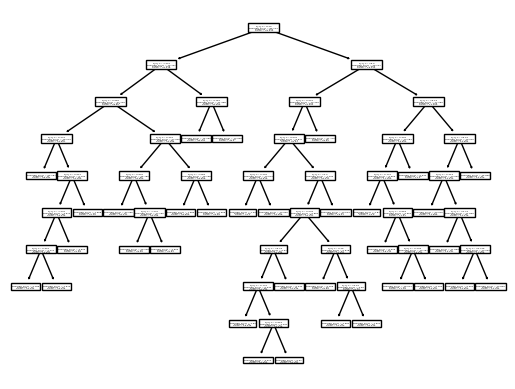

In [24]:
from sklearn.tree import plot_tree
regr_tree = DecisionTreeRegressor(max_depth=10, random_state=42, min_samples_leaf=10)
regr_tree.fit(X_train, y_train)
plot_tree(regr_tree)
plt.show()

<h1> <b><span style="color:green">7.	Plot model error vs different values of cp (complexity parameter)</span></b></h1>

<Figure size 1000x600 with 0 Axes>

Text(0.5, 0, 'Complexity Parameter (cp)')

Text(0, 0.5, 'RMSE')

Text(0.5, 1.0, 'RMSE vs. Complexity Parameter (cp)')

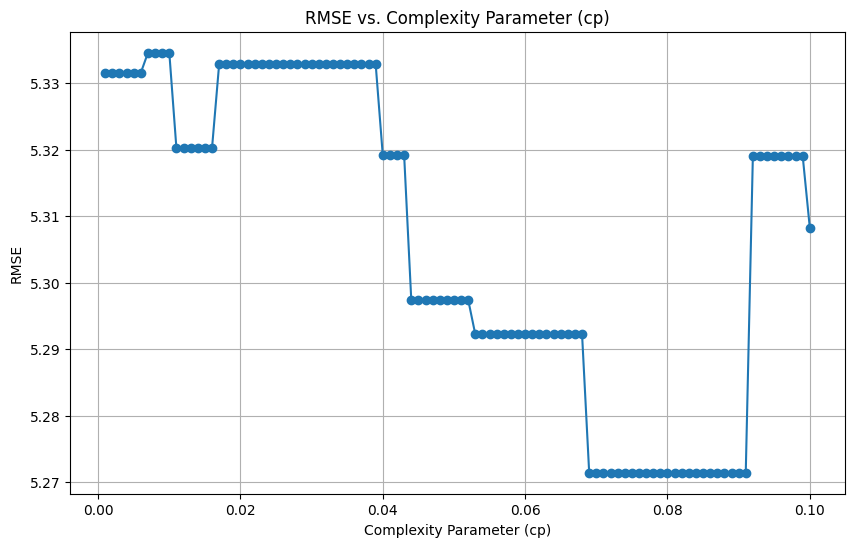

In [25]:
# Plot the RMSE values for different cp values
plt.figure(figsize=(10, 6))
plt.plot(cp_values, rmse_values, marker='o', linestyle='-')
plt.xlabel('Complexity Parameter (cp)')
plt.ylabel('RMSE')
plt.title('RMSE vs. Complexity Parameter (cp)')
plt.grid(True)

<h1> <b><span style="color:green">8.	Plot the best tuning parameter cp that minimize the model RMSE </span></b></h1>

<Figure size 1000x600 with 0 Axes>

Text(0.5, 0, 'Complexity Parameter (cp)')

Text(0, 0.5, 'RMSE')

Text(0.5, 1.0, 'RMSE vs. Complexity Parameter (cp)')

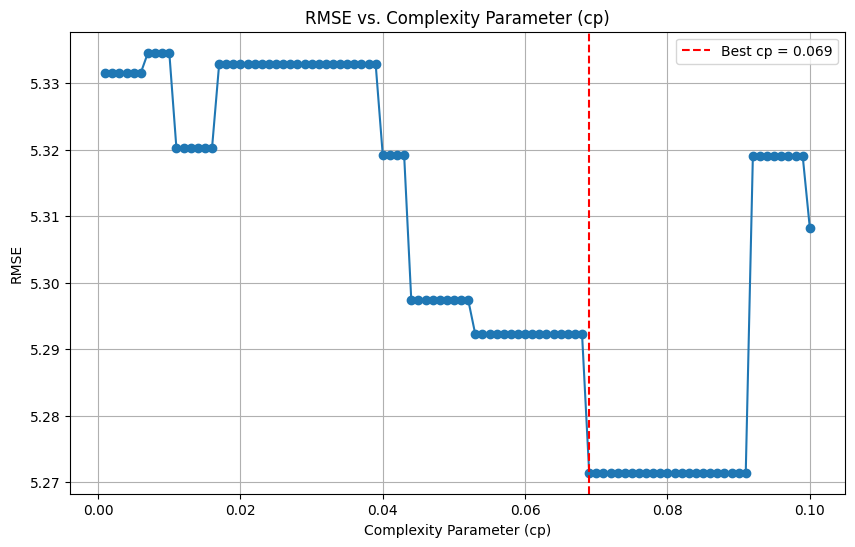

In [26]:
# Plot the RMSE values for different cp values
plt.figure(figsize=(10, 6))
plt.plot(cp_values, rmse_values, marker='o', linestyle='-')
plt.xlabel('Complexity Parameter (cp)')
plt.ylabel('RMSE')
plt.title('RMSE vs. Complexity Parameter (cp)')
plt.grid(True)

# Highlight the best cp value
plt.axvline(x=best_cp, color='r', linestyle='--', label=f'Best cp = {best_cp:.3f}')
plt.legend()
plt.show()

<h1> <b><span style="color:green">9. Plot the final tree model </span></b></h1>

DecisionTreeRegressor(ccp_alpha=0.069, max_depth=10, min_samples_leaf=10,
                      random_state=42)

[Text(0.5125, 0.9285714285714286, 'x[1] <= 8.13\nsquared_error = 85.144\nsamples = 404\nvalue = 22.612'),
 Text(0.2916666666666667, 0.7857142857142857, 'x[0] <= 7.437\nsquared_error = 76.701\nsamples = 139\nvalue = 31.378'),
 Text(0.18333333333333332, 0.6428571428571429, 'x[0] <= 6.681\nsquared_error = 37.749\nsamples = 115\nvalue = 28.55'),
 Text(0.06666666666666667, 0.5, 'x[1] <= 5.245\nsquared_error = 18.273\nsamples = 59\nvalue = 24.807'),
 Text(0.03333333333333333, 0.35714285714285715, 'squared_error = 55.187\nsamples = 11\nvalue = 28.082'),
 Text(0.1, 0.35714285714285715, 'x[0] <= 6.527\nsquared_error = 6.792\nsamples = 48\nvalue = 24.056'),
 Text(0.06666666666666667, 0.21428571428571427, 'x[1] <= 7.475\nsquared_error = 3.671\nsamples = 38\nvalue = 23.276'),
 Text(0.03333333333333333, 0.07142857142857142, 'squared_error = 2.411\nsamples = 28\nvalue = 23.864'),
 Text(0.1, 0.07142857142857142, 'squared_error = 3.522\nsamples = 10\nvalue = 21.63'),
 Text(0.13333333333333333, 0.21428

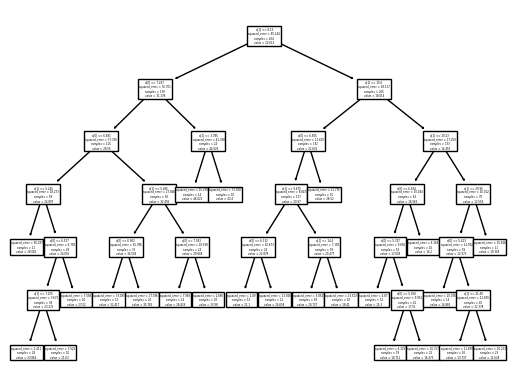

In [27]:
from sklearn.tree import plot_tree
regr_tree_boston3 = DecisionTreeRegressor(max_depth=10, random_state=42, min_samples_leaf=10, ccp_alpha=0.069)
regr_tree_boston3.fit(X_train, y_train)
plot_tree(regr_tree_boston3)
plt.show()

<h1> <b><span style="color:green">10. Use the model to predict a value of your choice </span></b></h1>

In [28]:
regr_tree_boston3.predict([[6, 12]])

C:\Users\dpdca\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([20.72650602])

If we set the independent variables as:

* RM = 6
* LSTAT = 12

Then the model predict the MEDV - Median value of owner-occupied homes is $20,727.